In [1]:
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})

In [78]:
ls clean_data/prices

BTCUSDT_day.csv     ETHUSDT_day.csv     XRPUSDT_day.csv
BTCUSDT_hour.csv    ETHUSDT_hour.csv    XRPUSDT_hour.csv
BTCUSDT_minute.csv  ETHUSDT_minute.csv  XRPUSDT_minute.csv


In [79]:
ls clean_data/tweets

BTC_tweets.csv  ETH_tweets.csv  XRP_tweets.csv


# Tweet count x price plots

## BTC

In [80]:
p = pd.read_csv("clean_data/prices/BTCUSDT_day.csv", parse_dates=['Date'])[['Date', 'Close', 'Volume']]
p.head()

,Date,Close,Volume
0,2017-08-17,4285.08,3.454770e+06
1,2017-08-18,4108.37,5.086958e+06
2,2017-08-19,4139.98,1.549484e+06
3,2017-08-20,4086.29,1.930364e+06
4,2017-08-21,4016.00,2.797232e+06


In [81]:
t = pd.read_csv("clean_data/tweets/BTC_tweets.csv", lineterminator='\n', parse_dates = ['timestamp'])
t['Date'] = t.timestamp.dt.date
t['counter'] = 1
t.head()

,tweet,username,timestamp,Date,counter
0,$BTC Price: $47933 $ETH Price: $3577 $LTC Pric...,coincapitan,2021-09-17 02:59:22,2021-09-17,1
1,@mikealfred @philipmak Zero chance $BTC will b...,tallseller,2021-09-17 02:58:54,2021-09-17,1
2,"$BTC is going to $80,000 by October 31st and $...",0xgoodies,2021-09-17 02:58:45,2021-09-17,1
3,Premium Membership Update! Made a few updates...,charts_bitcoin,2021-09-17 02:57:41,2021-09-17,1
4,Kind of agree. $TSLA $BTC. That’s about it.,umbisam,2021-09-17 02:57:28,2021-09-17,1


In [82]:
tt = t.groupby(['Date']).counter.value_counts()
tt = tt.reset_index(name = 'total')[['Date', 'total']]
tt.Date = pd.to_datetime(tt.Date)
tt.head()

,Date,total
0,2021-01-01,3944
1,2021-01-02,9427
2,2021-01-03,8425
3,2021-01-04,7570
4,2021-01-05,6131


In [83]:
j = pd.merge(p,tt, on='Date')
j.head()

,Date,Close,Volume,total
0,2021-01-01,29331.69,1.582527e+09,3944
1,2021-01-02,32178.33,4.073842e+09,9427
2,2021-01-03,33000.05,4.057598e+09,8425
3,2021-01-04,31988.71,4.429010e+09,7570
4,2021-01-05,33949.53,3.743617e+09,6131


In [84]:
j.corr()

,Close,Volume,total
Close,1.000000,0.136975,-0.007570
Volume,0.136975,1.000000,0.343388
total,-0.007570,0.343388,1.000000


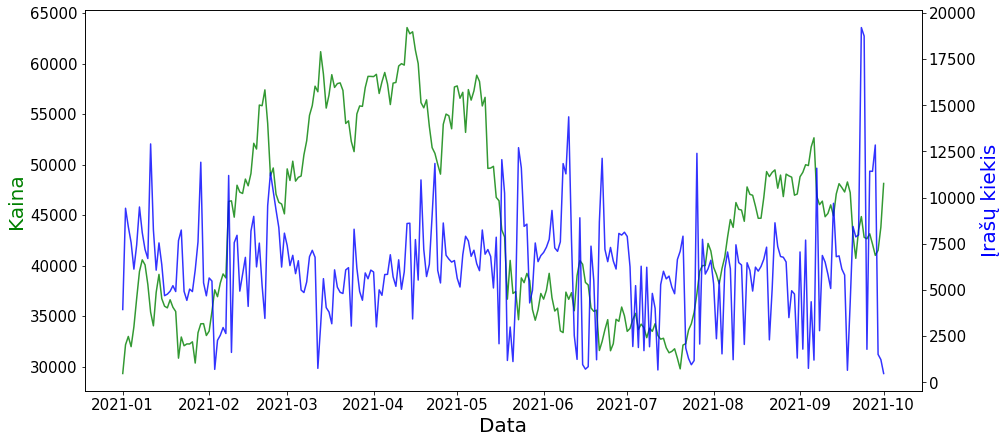

In [85]:
fig, ax1 = plt.subplots(figsize = (15, 7))

ax2 = ax1.twinx()
ax2.plot(j.Date, j.total, 'b-', alpha=0.8)
ax1.plot(j.Date, j.Close, 'g-', alpha=0.8)

ax1.set_xlabel('Data', fontsize=20)
ax1.set_ylabel('Kaina', color='g', fontsize=20)
ax2.set_ylabel('Įrašų kiekis', color='b', fontsize=20)

plt.savefig('btc_close_count.png', dpi=100)
plt.show()

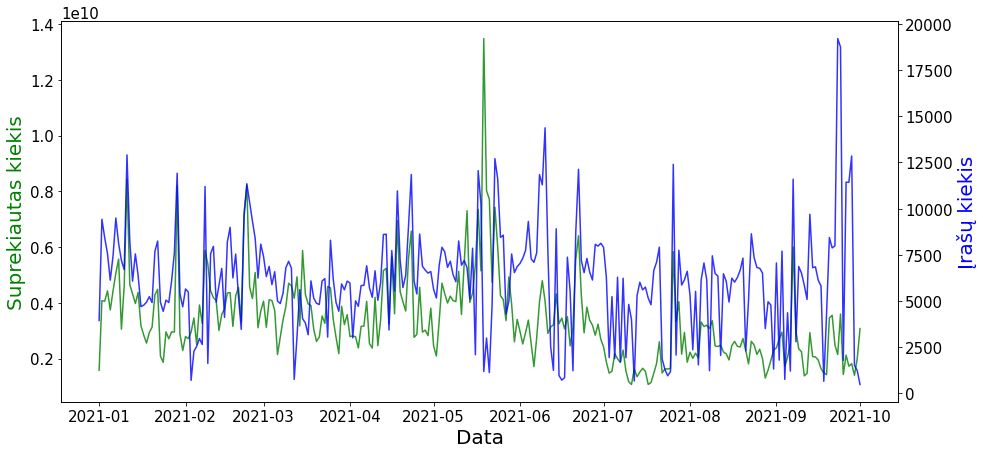

In [86]:
fig, ax1 = plt.subplots(figsize = (15, 7))

ax2 = ax1.twinx()
ax2.plot(j.Date, j.total, 'b-', alpha=0.8)
ax1.plot(j.Date, j.Volume, 'g-', alpha=0.8)

ax1.set_xlabel('Data', fontsize=20)
ax1.set_ylabel('Suprekiautas kiekis', color='g', fontsize=20)
ax2.set_ylabel('Įrašų kiekis', color='b', fontsize=20)

plt.savefig('btc_volume_count.png', dpi=100)
plt.show()

## XRP

In [87]:
p = pd.read_csv("clean_data/prices/XRPUSDT_day.csv", parse_dates=['Date'])[['Date', 'Close', 'Volume']]
p.head()

,Date,Close,Volume
0,2018-05-04,0.88990,1.894672e+07
1,2018-05-05,0.90280,1.528200e+07
2,2018-05-06,0.86483,1.399714e+07
3,2018-05-07,0.82490,1.419228e+07
4,2018-05-08,0.80667,1.057184e+07


In [88]:
t = pd.read_csv("clean_data/tweets/XRP_tweets.csv", lineterminator='\n', parse_dates = ['timestamp'])
t['Date'] = t.timestamp.dt.date
t['counter'] = 1
t.head()

,tweet,username,timestamp,Date,counter
0,7/23/2021 😇Follow @XRPL_Charts for daily stats...,xrpl_charts,2021-07-24 01:58:50,2021-07-24,1
1,7/23/2021 😇Follow @XRPL_Charts for daily stats...,xrpl_charts,2021-07-24 01:57:51,2021-07-24,1
2,@TheCryptoDog Guessing nobody will care about ...,timboulet,2021-07-24 01:57:19,2021-07-24,1
3,#XRPCommunity #XRPthestandard #xrparmy #TeamXR...,doms_crypto,2021-07-24 01:56:10,2021-07-24,1
4,This blog is 100x more hilarious than it shoul...,quadjacksxrp,2021-07-24 01:55:24,2021-07-24,1


In [89]:
tt = t.groupby(['Date']).counter.value_counts()
tt = tt.reset_index(name = 'total')[['Date', 'total']]
tt.Date = pd.to_datetime(tt.Date)
tt.head()

,Date,total
0,2021-01-01,1818
1,2021-01-02,1837
2,2021-01-03,2184
3,2021-01-04,2294
4,2021-01-05,2306


In [90]:
j = pd.merge(p,tt, on='Date')
j.head()

,Date,Close,Volume,total
0,2021-01-01,0.23746,3.517304e+08,1818
1,2021-01-02,0.22064,2.568903e+08,1837
2,2021-01-03,0.22540,2.635600e+08,2184
3,2021-01-04,0.23565,3.556874e+08,2294
4,2021-01-05,0.22573,2.716537e+08,2306


In [91]:
j.corr()

,Close,Volume,total
Close,1.000000,0.646727,0.305073
Volume,0.646727,1.000000,0.749393
total,0.305073,0.749393,1.000000


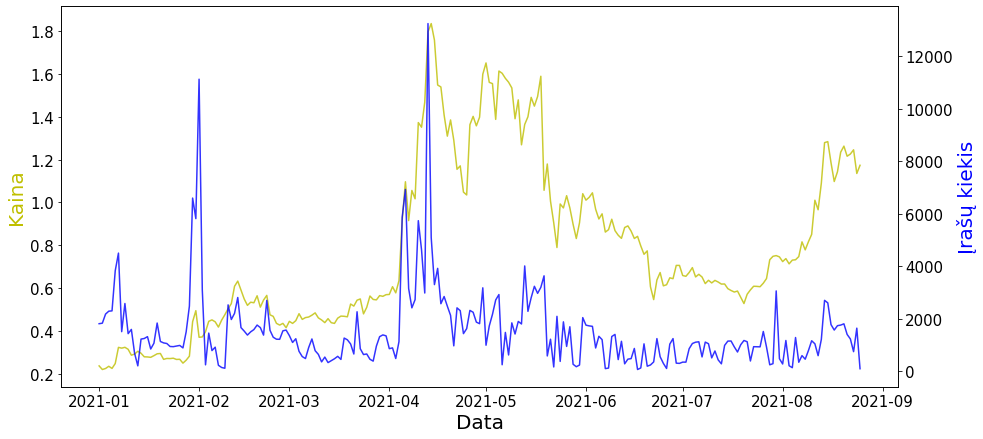

In [92]:
fig, ax1 = plt.subplots(figsize = (15, 7))

ax2 = ax1.twinx()
ax2.plot(j.Date, j.total, 'b-', alpha=0.8)
ax1.plot(j.Date, j.Close, 'y-', alpha=0.8)

ax1.set_xlabel('Data', fontsize=20)
ax1.set_ylabel('Kaina', color='y', fontsize=20)
ax2.set_ylabel('Įrašų kiekis', color='b', fontsize=20)

plt.savefig('xrp_close_count.png', dpi=100)
plt.show()

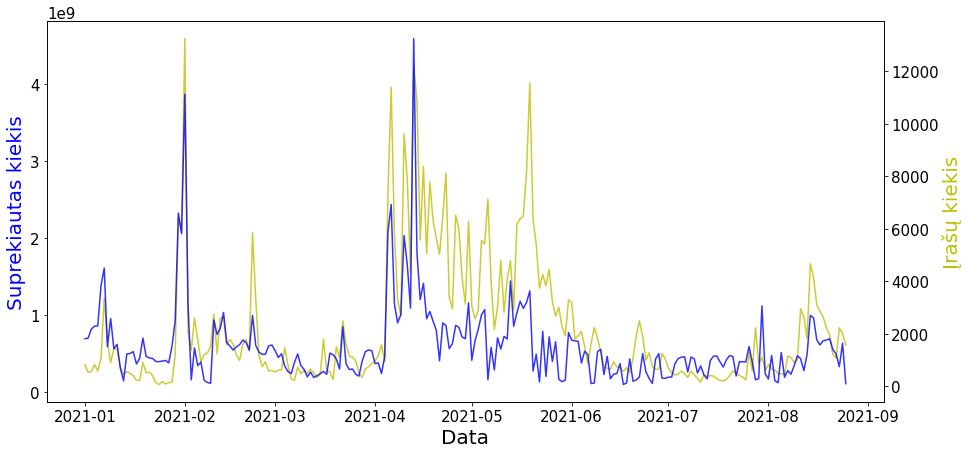

In [93]:
fig, ax1 = plt.subplots(figsize = (15, 7))

ax2 = ax1.twinx()
ax2.plot(j.Date, j.total, 'b-', alpha=0.8)
ax1.plot(j.Date, j.Volume, 'y-', alpha=0.8)

ax1.set_xlabel('Data', fontsize=20)
ax1.set_ylabel('Suprekiautas kiekis', color='b', fontsize=20)
ax2.set_ylabel('Įrašų kiekis', color='y', fontsize=20)

plt.savefig('xrp_volume_count.png', dpi=100)
plt.show()

# Price change plots

In [2]:
plt.rcParams.update({'font.size': 22})

## BTC

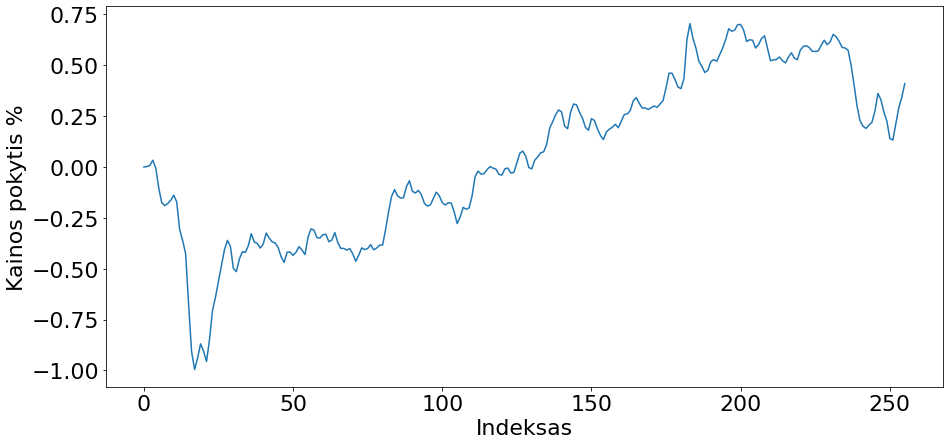

In [3]:
btc = pd.read_csv("train_val_data/BTC_train.csv", lineterminator='\n')
plt.figure(figsize=(15, 7))
plt.xlabel("Indeksas")
plt.ylabel("Kainos pokytis %")
plt.plot([i for i in range(256)], btc.iloc[0, 1:])
plt.savefig('btc_pct_change.png')

## ETH

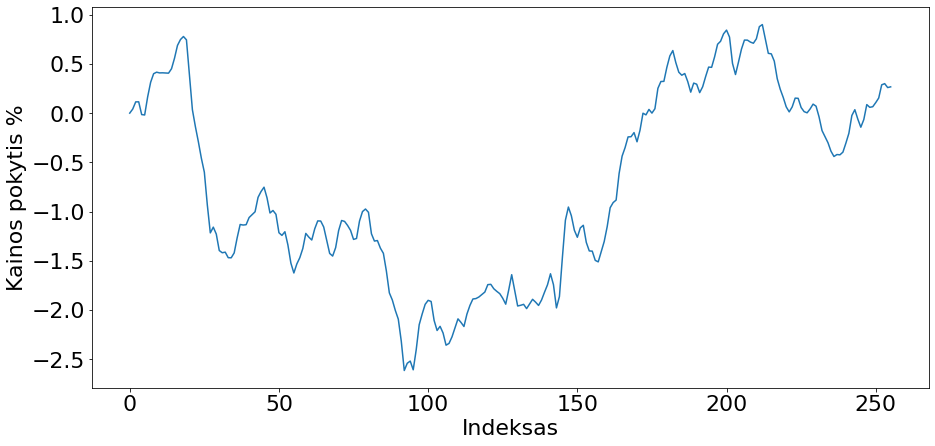

In [6]:
eth = pd.read_csv("train_val_data/ETH_train.csv", lineterminator='\n')
plt.figure(figsize=(15, 7))
plt.xlabel("Indeksas")
plt.ylabel("Kainos pokytis %")
plt.plot([i for i in range(256)], eth.iloc[0, 1:])
plt.savefig('eth_pct_change.png')

## XRP

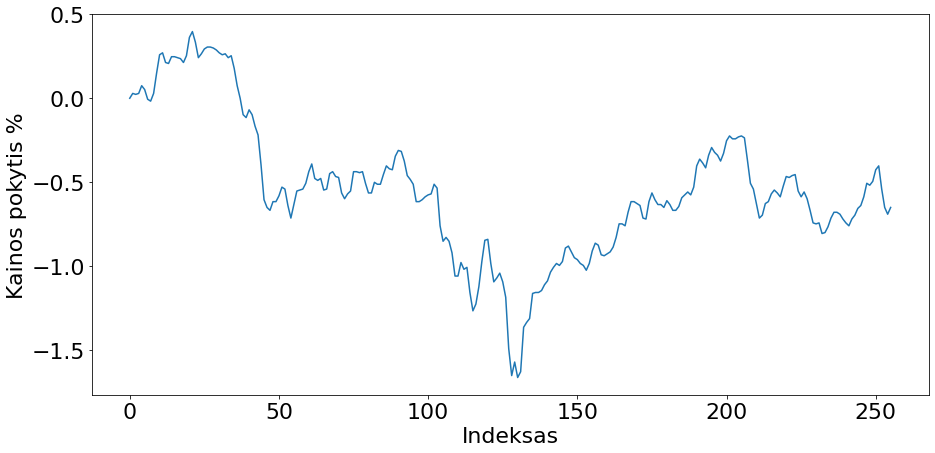

In [9]:
xrp = pd.read_csv("train_val_data/XRP_train.csv", lineterminator='\n')
plt.figure(figsize=(15, 7))
plt.xlabel("Indeksas")
plt.ylabel("Kainos pokytis %")
plt.plot([i for i in range(256)], xrp.iloc[0, 1:])
plt.savefig('xrp_pct_change.png')

In [10]:
xrp.iloc[0, 0]

"@Kevin_Cage_ $XRP - 👆🏾 that's me when I think about my XRP 💰  https://t.co/RC43CLMhlV"

# Training and validation loss plots

## Original CLIP

In [2]:
def get_losses(data):
    tl = []
    vl = []

    for i in df:
        if 'train_loss' in i:
            tl.append(float(i.split("train_loss=")[1].split("]")[0]))

        if 'valid_loss' in i:
            vl.append(float(i.split("valid_loss=")[1].split("]")[0]))
    print("Lengths", len(tl), len(vl))
    return tl, vl

### BTC

Lengths 81 81


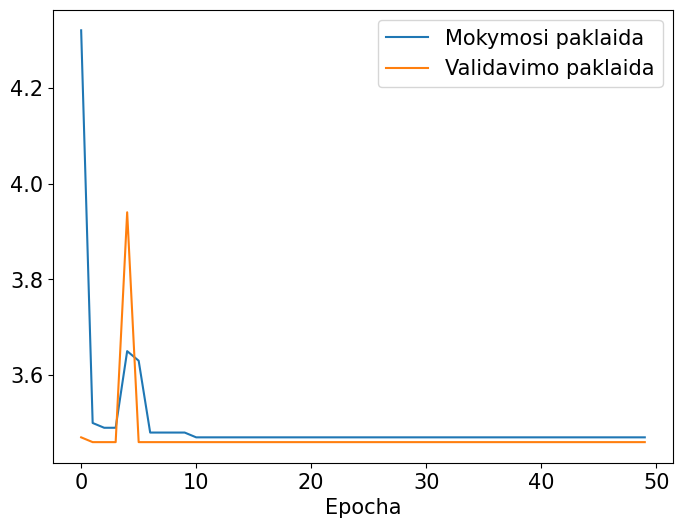

In [10]:
df = pd.read_fwf('training_logs/BTC_images_100_epoch_10000.txt').INTRO.values
btc_tl, btc_vl = get_losses(df)
n = 50
ids = [i for i in range(n)]

plt.figure(figsize=(8, 6), dpi=100)
plt.xlabel("Epocha")
plt.plot(ids, btc_tl[:n], label = 'Mokymosi paklaida')
plt.plot(ids, btc_vl[:n], label = 'Validavimo paklaida')
plt.legend(loc="upper right")
plt.savefig('image_loss.png', dpi=100)

### ETH

Lengths 50 50


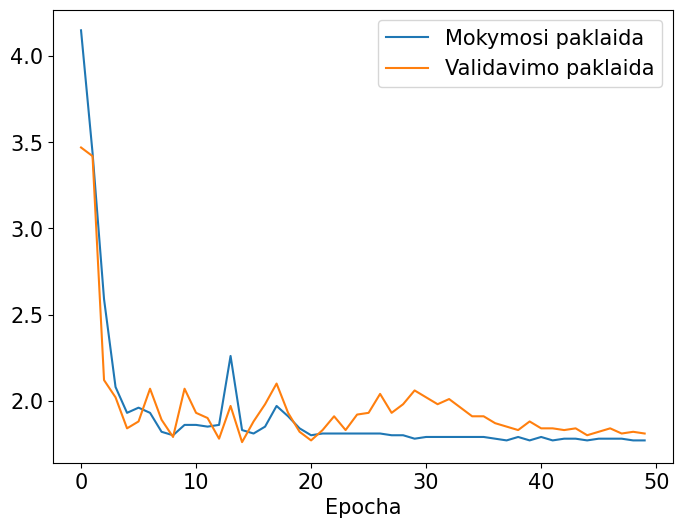

In [4]:
df = pd.read_fwf('training_logs/ETH_images_50_epoch_10000.txt').INTRO.values
eth_tl, eth_vl = get_losses(df)
n = len(eth_tl)
ids = [i for i in range(n)]
plt.figure(figsize=(8, 6), dpi=100)
plt.xlabel("Epocha")
plt.plot(ids, eth_tl[:n], label = 'Mokymosi paklaida')
plt.plot(ids, eth_vl[:n], label = 'Validavimo paklaida')
plt.legend(loc="upper right")
plt.savefig('eth_mage_loss.png', dpi=100)

### XRP

Lengths 50 50


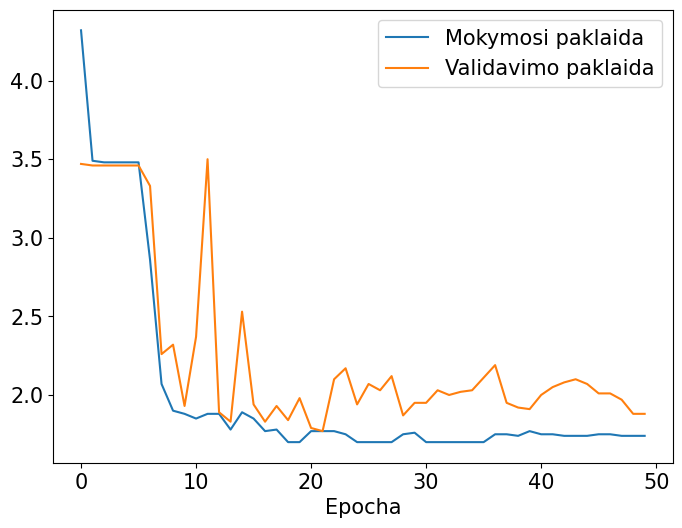

In [8]:
df = pd.read_fwf('training_logs/XRP_images_50_epoch_10000.txt').INTRO.values
eth_tl, eth_vl = get_losses(df)
n = len(eth_tl)
ids = [i for i in range(n)]
plt.figure(figsize=(8, 6), dpi=100)
plt.xlabel("Epocha")
plt.plot(ids, eth_tl[:n], label = 'Mokymosi paklaida')
plt.plot(ids, eth_vl[:n], label = 'Validavimo paklaida')
plt.legend(loc="upper right")
plt.savefig('xrp_mage_loss.png', dpi=100)

## Modified CLIP

In [12]:
def parse_output(filename, imagepath):
    file = open(filename,mode='r')
    df = file.read()
    file.close()
    
    trains = []
    valids = []
    
    byepoch = df.split('Epoch')
    for epoch in tqdm(byepoch[1:]):
        a = []
        b = []
        byline = epoch.split('\n')
        for i in byline:
            if 'train_loss' in i:
                a.append(float(i.split("train_loss=")[1].split("]")[0]))
            if 'valid_loss' in i:
                b.append(float(i.split("valid_loss=")[1].split("]")[0]))
        trains.append(a[-1])
        valids.append(b[-1])
        
    n = len(trains)
    ids = [i for i in range(n)]
    plt.figure(figsize=(8, 6), dpi=100)
    plt.xlabel("Epocha")
    plt.plot(ids, trains[:n], label = 'Mokymosi paklaida')
    plt.plot(ids, valids[:n], label = 'Validavimo paklaida')
    plt.legend(loc="upper right")
    plt.savefig(imagepath, dpi=100)
    

100%|██████████| 20/20 [00:00<00:00, 565.53it/s]


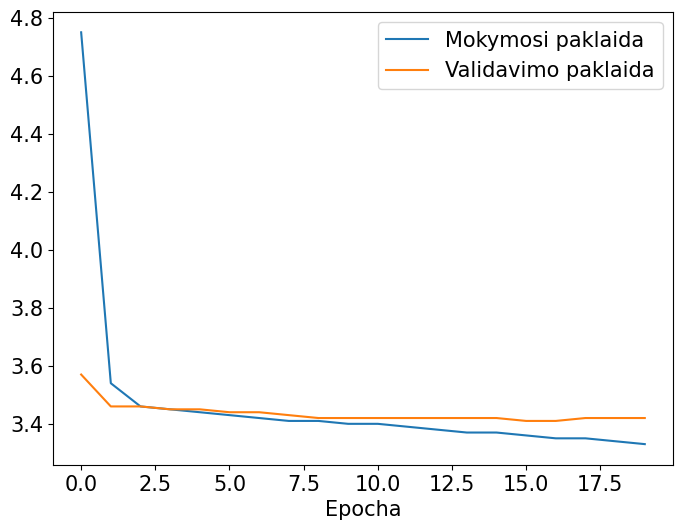

In [13]:
parse_output('training_logs/BTC_100000_training.txt', 'btc_ts_loss.png')

100%|██████████| 20/20 [00:00<00:00, 556.48it/s]


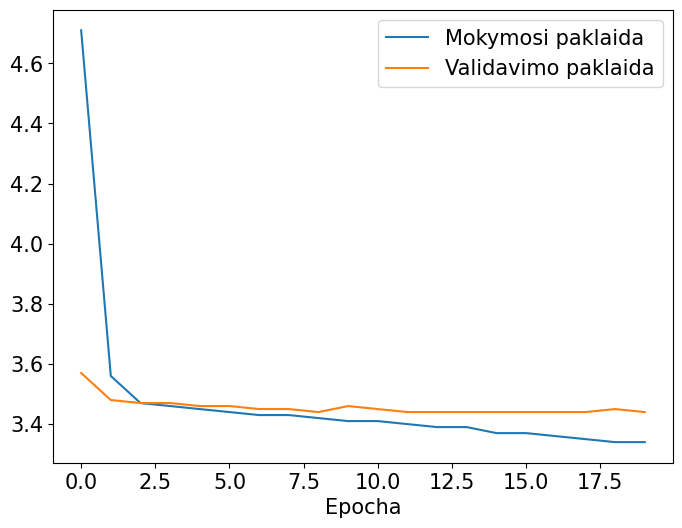

In [14]:
parse_output('training_logs/ETH_100000_training.txt', 'eth_ts_loss.png')

100%|██████████| 20/20 [00:00<00:00, 574.17it/s]


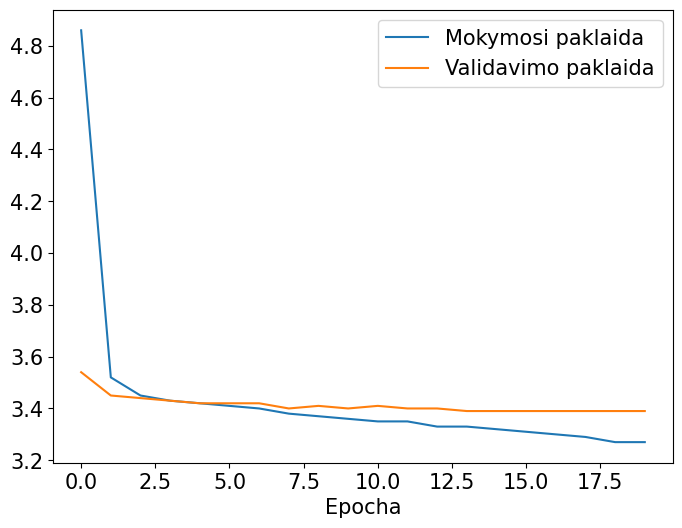

In [15]:
parse_output('training_logs/XRP_100000_training.txt', 'xrp_ts_loss.png')